Алиева Хадижат ПИ20-1. Лабораторная работа 3.1. Оценка эффективности моделей бинарной классификации

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn. discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score

1. Загрузите данные о вероятности развития сердечного приступа. 

In [ ]:
heart = pd.read_csv('heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


2. Разделите данные на обучающую и тестовую выборки в соотношении 80% / 20% без перемешивания.

In [ ]:
#тк в датасете присутствуют строковые данные, их необходимо заменить на числовые данные
from sklearn import preprocessing 
le = preprocessing.LabelEncoder() #перекодирую метки с помощью LabelEncoder
heart['Sex'] = le.fit_transform(heart['Sex']) #с помощью fit_transform нормализую метки и привожу нечисловые метки в числовые
heart['ChestPainType'] = le.fit_transform(heart['ChestPainType'])
heart['RestingECG'] = le.fit_transform(heart['RestingECG'])
heart['ExerciseAngina'] = le.fit_transform(heart['ExerciseAngina'])
heart['ST_Slope'] = le.fit_transform(heart['ST_Slope'])

In [ ]:
target = "HeartDisease"
y = heart[target]
x = heart.drop(target, axis=1)
#x = x.drop(["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], axis=1)

In [ ]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Постройте следующие модели классификации:
- случайное предсказание (подбрасывание кубика)
- логистическая регрессия (LogisticRegression);
- метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)
- метод k ближайших соседей (KNeighborsClassifier с двумя классами).

- случайное предсказание (подбрасывание кубика)

In [ ]:
RP_model = np.random.randint(low=0, high=2, size=len(y_test))

- логистическая регрессия (LogisticRegression);

In [ ]:
LR_model = LogisticRegression(solver="liblinear") #LIBLINEAR – A Library for Large Linear Classification
LR_model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

- метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)

In [ ]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(x_train, y_train)

LinearDiscriminantAnalysis()

- метод k ближайших соседей (KNeighborsClassifier с двумя классами).

In [ ]:
KN_model = KNeighborsClassifier(n_neighbors=2)
KN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

4. На основе метрики accuracy сделайте вывод о недообученности-переобученности модели логистической регрессии. Для этого сделайте предсказание на тренировочном датасете и посчитайте accuracy на нём, затем на тестовом датасете и тоже посчитайте accuracy. Сравните эти значения, они должны быть примерно одинаковыми. Если точность на обучающей выборке оказывается сильно выше - это означает, что модель переобучилась.

Accuracy на тренировочном сете:

In [ ]:
y_pred_train = LR_model.predict(x_train)
accuracy_score(y_train, y_pred_train)

0.8487738419618529

Accuracy на тестовом сете:

In [ ]:
y_pred_test = LR_model.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.8804347826086957

Значения точности приблизительно равны, значит модель логистической регрессии обучилась корректно.

5. Сделайте вывод о применимости каждой модели на основе метрики F1-score (чем выше её значение, тем модель эффективнее).

F1-score – среднее гармоническое между точностью (Precision) и полнотой (Recall).

F1=2*(Precision×Recall)/(Precision+Recall)

Для случайного предсказания:

In [ ]:
#y_pred_test_RP = RP_model.predict(x_test)
f1_RP = f1_score(y_test, RP_model)
f1_RP

0.5294117647058822

Для логистической регрессии:

In [ ]:
f1_LR = f1_score(y_test, y_pred_test)
f1_LR

0.8921568627450981

Для метода линейного дискриминантного анализа:

In [ ]:
y_pred_test_LDA = LDA_model.predict(x_test)
f1_LDA = f1_score(y_test, y_pred_test_LDA)
f1_LDA

# print(metrics.classification_report(y_test, y_pred_test_LDA))

0.896551724137931

Для метода k ближайших соседей:

In [ ]:
y_pred_test_KN = KN_model.predict(x_test)
f1_KN = f1_score(y_test, y_pred_test_KN)
f1_KN

0.6395348837209303

6. На одном графике постройте ROC-кривые для каждой модели. Визуально определите самую эффективную и наименее пригодную модели. Чем ROC-кривая выше, тем модель более эффективна.

In [ ]:
y_pred_proba_LR = LR_model.predict_proba(x_test) #предсказанная вероятность принадлжености к определенному признаку (классу)
probs_LR = y_pred_proba_LR[:, 1] #берем принадлежность к классу 1
fpr_LR, tpr_LR, treshold_LR = roc_curve(y_test, probs_LR) #fpr – частота false positive результатов (true negative rate), tpr – частота true positive результатов (чувствительность)

y_pred_proba_LDA = LDA_model.predict_proba(x_test)
probs_LDA = y_pred_proba_LDA[:, 1]
fpr_LDA, tpr_LDA, treshold_LDA = roc_curve(y_test, probs_LDA)

y_pred_proba_KN = KN_model.predict_proba(x_test)
probs_KN = y_pred_proba_KN[:, 1]
fpr_KN, tpr_KN, treshold_KN = roc_curve(y_test, probs_KN)

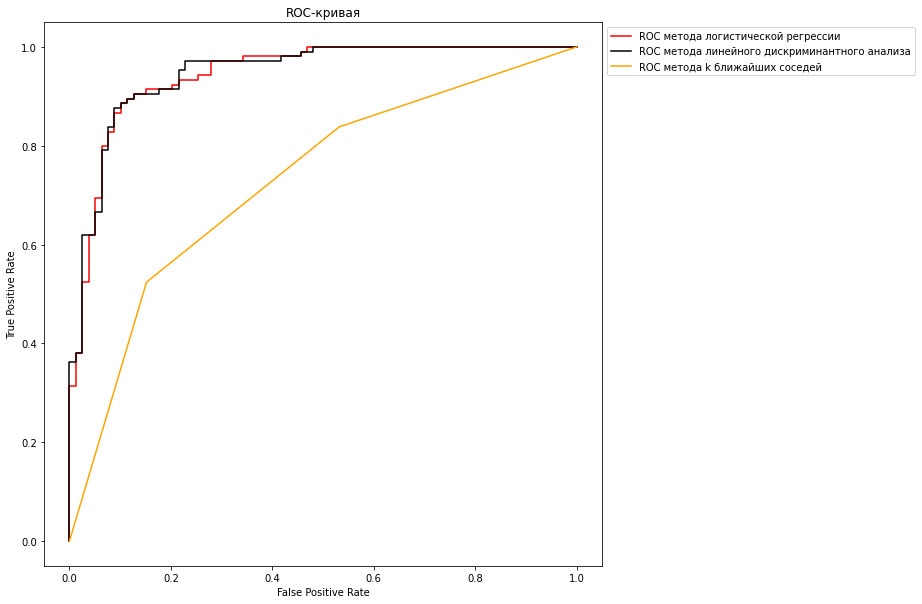

In [ ]:
#кривая ROC — это отношение TPR к FPR

plt.figure(figsize=(10, 10))
plt.plot(fpr_LR, tpr_LR, color='red', label='ROC метода логистической регрессии')
plt.plot(fpr_LDA, tpr_LDA, color='black', label='ROC метода линейного дискриминантного анализа')
plt.plot(fpr_KN, tpr_KN, color='orange', label='ROC метода k ближайших соседей')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(bbox_to_anchor=(1,1), loc="best")
plt.show()

7. Выведите соответствующие значения AUC (площадь под ROC - кривой) и расположите модели в порядке пригодности.

In [ ]:
#Площадь под кривой (AUC) является мерой способности классификатора различать классы

roc_auc_LR = auc(fpr_LR, tpr_LR)
roc_auc_LDA = auc(fpr_LDA, tpr_LDA)
roc_auc_KN = auc(fpr_KN, tpr_KN)

print(f'Самая пригодная: модель метода линейного дискриминантного анализа со значением {roc_auc_LDA}\nМодель метода линейной регрессии со значением {roc_auc_LR}\nСамая непригодная: модель метода k ближайших соседей со значением {roc_auc_KN}')

Самая пригодная: модель метода линейного дискриминантного анализа со значением 0.9461121157323689
Модель метода линейной регрессии со значением 0.9438215792646172
Самая непригодная: модель метода k ближайших соседей со значением 0.7288125376732972
